🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

# 线性回归

一个简单的例子，线性模型$y = \alpha  + \beta x$的拟合：$$y = \alpha  + \beta x$$

## 生成数据

In [1]:
# 导入模块
import numpy as np

我爱北京天安门   
天安门上太阳升

In [2]:
x = np.random.random(30)
x

array([0.99100815, 0.6259113 , 0.95440777, 0.49139682, 0.74049611,
       0.86682801, 0.74550529, 0.42094363, 0.21957013, 0.44931541,
       0.69923013, 0.25556388, 0.83554287, 0.9076406 , 0.99364108,
       0.05560841, 0.79264274, 0.59960295, 0.32888877, 0.70310711,
       0.25711813, 0.25369939, 0.13858615, 0.52826075, 0.81417508,
       0.69995757, 0.61037159, 0.84205404, 0.35615539, 0.4205563 ])

In [3]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [4]:
x = 10 * x
x

array([9.91008153, 6.25911298, 9.54407774, 4.91396821, 7.40496113,
       8.66828013, 7.45505293, 4.20943634, 2.19570134, 4.49315414,
       6.99230128, 2.55563885, 8.35542872, 9.07640595, 9.93641083,
       0.55608411, 7.92642738, 5.99602949, 3.28888774, 7.03107108,
       2.57118125, 2.53699395, 1.38586153, 5.28260751, 8.14175079,
       6.99957567, 6.10371592, 8.42054045, 3.56155391, 4.20556303])

In [5]:
y = 20 * x + 3
y

array([201.2016306 , 128.18225961, 193.8815548 , 101.27936411,
       151.09922267, 176.36560261, 152.1010585 ,  87.18872682,
        46.91402676,  92.86308288, 142.84602565,  54.11277697,
       170.10857446, 184.52811901, 201.72821658,  14.12168224,
       161.52854764, 122.92058982,  68.77775483, 143.62142156,
        54.42362508,  53.73987894,  30.71723065, 108.65215014,
       165.83501572, 142.99151346, 125.07431849, 171.41080892,
        74.23107818,  87.11126054])

增加扰动项：$y = ax + b + \varepsilon $

In [6]:
y = 20 * x + 3 + np.random.randn(30)
y

array([200.42446798, 129.19090475, 195.05653606, 101.04210187,
       150.93229476, 176.41746446, 151.86734615,  86.61939074,
        48.07121402,  92.76406678, 143.33078837,  53.03865469,
       169.90621017, 185.31906626, 200.48967138,  15.36578574,
       161.92318456, 123.79042794,  66.95857199, 144.42399508,
        54.58977527,  53.93263062,  31.38832066, 108.61606069,
       164.67916609, 142.32247153, 125.6413373 , 169.24676772,
        74.55119277,  86.33236284])

## 绘制散点图 

In [7]:
import pandas as pd
from plotnine import *

%matplotlib inline

In [8]:
x_y = pd.DataFrame({"x": x, "y": y})
x_y.sample(10)

,x,y
22,1.385862,31.388321
19,7.031071,144.423995
3,4.913968,101.042102
23,5.282608,108.616061
29,4.205563,86.332363
8,2.195701,48.071214
15,0.556084,15.365786
21,2.536994,53.932631
24,8.141751,164.679166
25,6.999576,142.322472


In [9]:
x_y.describe()

,x,y
count,30.000000,30.000000
mean,5.865929,120.274408
std,2.697441,53.786965
min,0.556084,15.365786
25%,3.722556,77.496485
50%,6.181414,127.416121
75%,8.087920,163.990171
max,9.936411,200.489671


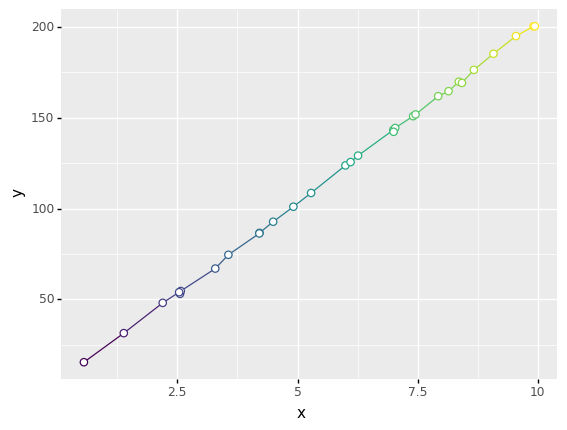

<ggplot: (130043009193)>

In [10]:
(
    ggplot(x_y, aes(x="x", y="y", colour="x+y"))
    + geom_line()
    + geom_point(fill="white", size=2.5)
    + theme(legend_position="none")
)

## 模型拟合

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()

In [13]:
x = x.reshape(-1, 1)

In [14]:
reg.fit(x, y)

LinearRegression()

In [15]:
print("Fitted lm model is y={:.3}x+{:.3}".format(reg.coef_[0], reg.intercept_))

Fitted lm model is y=19.9x+3.32


## 拟合效果

In [16]:
yhat = reg.predict(x)
yhat

array([200.90425074, 128.11347815, 193.60709157, 101.29480632,
       150.95869613, 176.14597577, 151.95739556,  87.24828194,
        47.09966804,  92.90487355, 142.73133701,  54.27588145,
       169.90853621, 184.28293815, 201.42918816,  14.409985  ,
       161.35537049, 122.86828083,  68.89494834, 143.50430543,
        54.5857564 ,  53.90415083,  30.9535785 , 108.64451071,
       165.6483565 , 142.87636935, 125.01526692, 171.20669382,
        74.33119922,  87.17105818])

In [17]:
x_y_yhat = pd.DataFrame({"x": x.flatten(), "y": y, "yhat": yhat})

In [18]:
x_y_yhat_melt = pd.melt(x_y_yhat, id_vars="x", var_name="y_type", value_name="value")
x_y_yhat_melt.sample(10)

,x,y_type,value
38,2.195701,yhat,47.099668
24,8.141751,y,164.679166
9,4.493154,y,92.764067
56,6.103716,yhat,125.015267
50,2.571181,yhat,54.585756
16,7.926427,y,161.923185
29,4.205563,y,86.332363
17,5.996029,y,123.790428
47,5.996029,yhat,122.868281
8,2.195701,y,48.071214


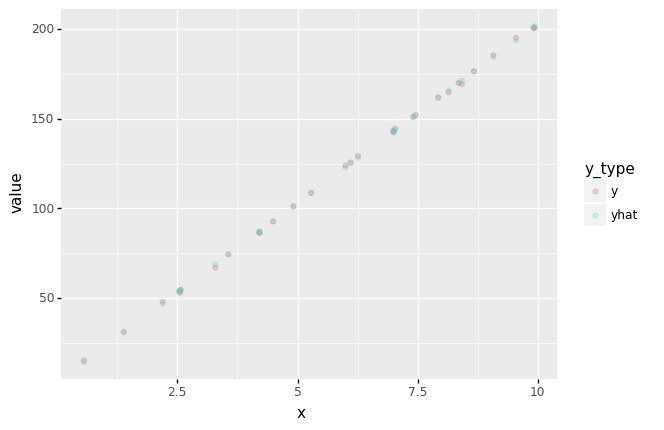

<ggplot: (130043203002)>

In [19]:
(ggplot(x_y_yhat_melt, aes(x="x", y="value", colour="y_type")) + geom_point(alpha=0.25))

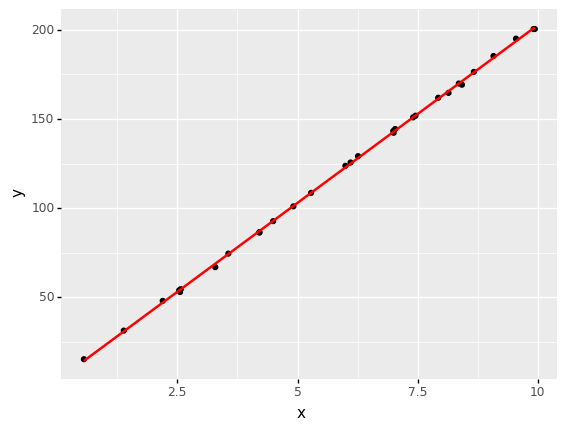

<ggplot: (130043057996)>

In [20]:
(ggplot(x_y, aes(x="x", y="y")) + geom_point() + geom_smooth(method="lm", color="red"))

In [21]:
from statsmodels.api import OLS

In [22]:
lm2 = OLS(x, y).fit()

In [23]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.921e+05
Date:                Mon, 21 Mar 2022   Prob (F-statistic):                    5.76e-57
Time:                        19:28:37   Log-Likelihood:                          33.545
No. Observations:                  30   AIC:                                     -65.09
Df Residuals:                      29   BIC:                                     -63.69
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0490      0.000    438.275      0.000       0.049       0.049
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.022
Skew:                          -0.065   Prob(JB):                        0.989
Kurtosis:                       3.022   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 简单的函数绘图

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
x = np.linspace(0, 1, 50)

In [26]:
k = 10
y = k * x * np.sin(k * np.pi * x)

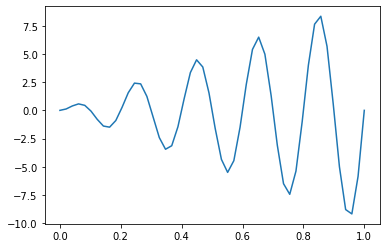

In [27]:
plt.plot(x, y)

🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

把上边的曲线变得圆滑一点：

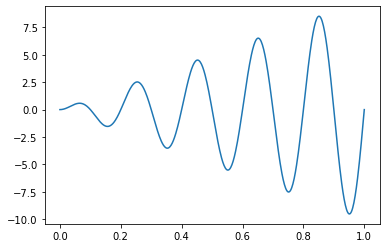

In [28]:
x = np.linspace(0, 1, 500)
k = 10
y = k * x * np.sin(k * np.pi * x)
plt.plot(x, y)

# 傅里叶变换

In [29]:
from scipy.io import wavfile

# 读入波形文件
rate, xy = wavfile.read("datasets/Windows User Account Control.wav")
x = xy[:, 0]
y = xy[:, 1]

Text(0.5, 1.0, 'Spectrogram')

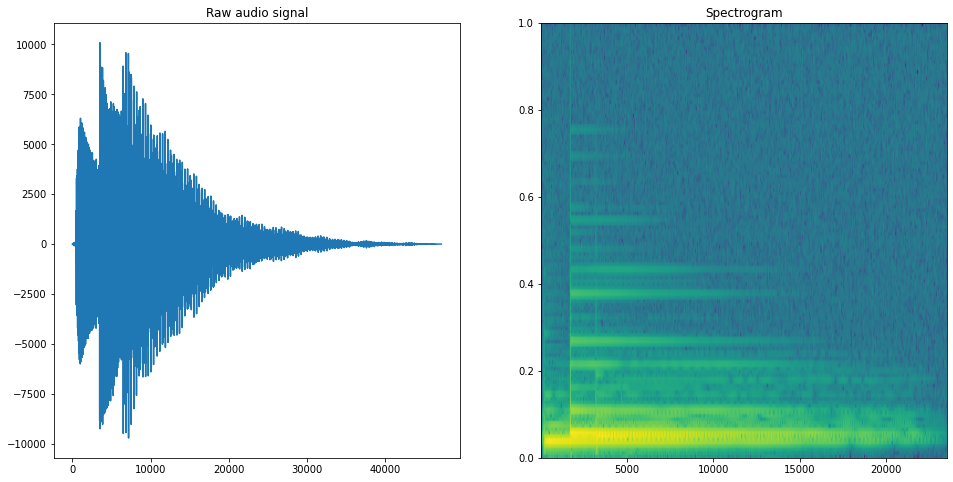

In [30]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.plot(x)
ax1.set_title("Raw audio signal")
ax2.specgram(x)
ax2.set_title("Spectrogram")

<!--NAVIGATION-->
< [实验环境配置](ch01_实验环境配置.ipynb) | [Contents](Index.ipynb) | [Python基础知识 A](ch02_python基础知识A.ipynb)>